In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


1. Считать в `pandas.DataFrame` любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.
   > Возможно, потребуется использовать два датасета: один для бинарной классификации, второй для многоклассовой.

In [70]:
df = pd.read_csv('../dataset/Score.csv')  # замените путь на локальный путь к датасету

2. Бинарная классификация:

In [71]:
# 1. Привести описание датасета.
print(df.head())
print(df.info())
print(df['Credit_Score'].value_counts())

   Delay_from_due_date  Num_of_Delayed_Payment  Num_Credit_Inquiries  \
0                  3.0                     7.0                   4.0   
1                  3.0                     7.0                   4.0   
2                  3.0                     7.0                   4.0   
3                  5.0                     4.0                   4.0   
4                  6.0                     4.0                   4.0   

   Credit_Utilization_Ratio  Credit_History_Age Payment_of_Min_Amount  \
0                 26.822620               265.0                    No   
1                 31.944960               265.0                    No   
2                 28.609352               267.0                    No   
3                 31.377862               268.0                    No   
4                 24.797347               269.0                    No   

   Amount_invested_monthly  Monthly_Balance Credit_Score Credit_Mix  ...  \
0                80.415295       312.494089         

In [72]:
# Осуществить предобработку данных (избавиться от `null`, убрать некоторые признаки и т.п.) - "подчистить данные".
df['target'] = df['Credit_Score'].apply(lambda x: 1 if x == 'Poor' else 0)
df = df.dropna()

In [73]:
# Закодировать категориальные признаки при необходимости.
categorical_cols = df.select_dtypes(include=['object']).columns.drop('Credit_Score')
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [74]:
# Выбрать какое-нибудь значение гиперпараметра $k$ алгоритма $kNN$.
k = 5

In [75]:
# Разбить выборку на обучающую и тестовую.
X = df_encoded.drop(columns=['Credit_Score', 'target'])
y = df_encoded['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [76]:
# Осуществить бинарную классификацию.
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [77]:
# Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.
print("=== Без нормализации ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

=== Без нормализации ===
Accuracy: 0.8587434973989596
Precision: 0.7564397424103035
Recall: 0.7564397424103035
F1-Score: 0.7564397424103035
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     21292
           1       0.76      0.76      0.76      8696

    accuracy                           0.86     29988
   macro avg       0.83      0.83      0.83     29988
weighted avg       0.86      0.86      0.86     29988



In [78]:
# Нормализовать данные (`StandardScaler`или `MinMaxScaler`).
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_s, X_test_s, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)


In [79]:
# Осуществить бинарную классификацию.
knn.fit(X_train_s, y_train)
y_pred_scaled = knn.predict(X_test_s)

In [80]:
# Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.
print("=== С нормализацией ===")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("Precision:", precision_score(y_test, y_pred_scaled))
print("Recall:", recall_score(y_test, y_pred_scaled))
print("F1-Score:", f1_score(y_test, y_pred_scaled))
print(classification_report(y_test, y_pred_scaled))

=== С нормализацией ===
Accuracy: 0.8510070694944645
Precision: 0.7591956841589014
Recall: 0.7120515179392825
F1-Score: 0.7348682648943745
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     21292
           1       0.76      0.71      0.73      8696

    accuracy                           0.85     29988
   macro avg       0.82      0.81      0.82     29988
weighted avg       0.85      0.85      0.85     29988



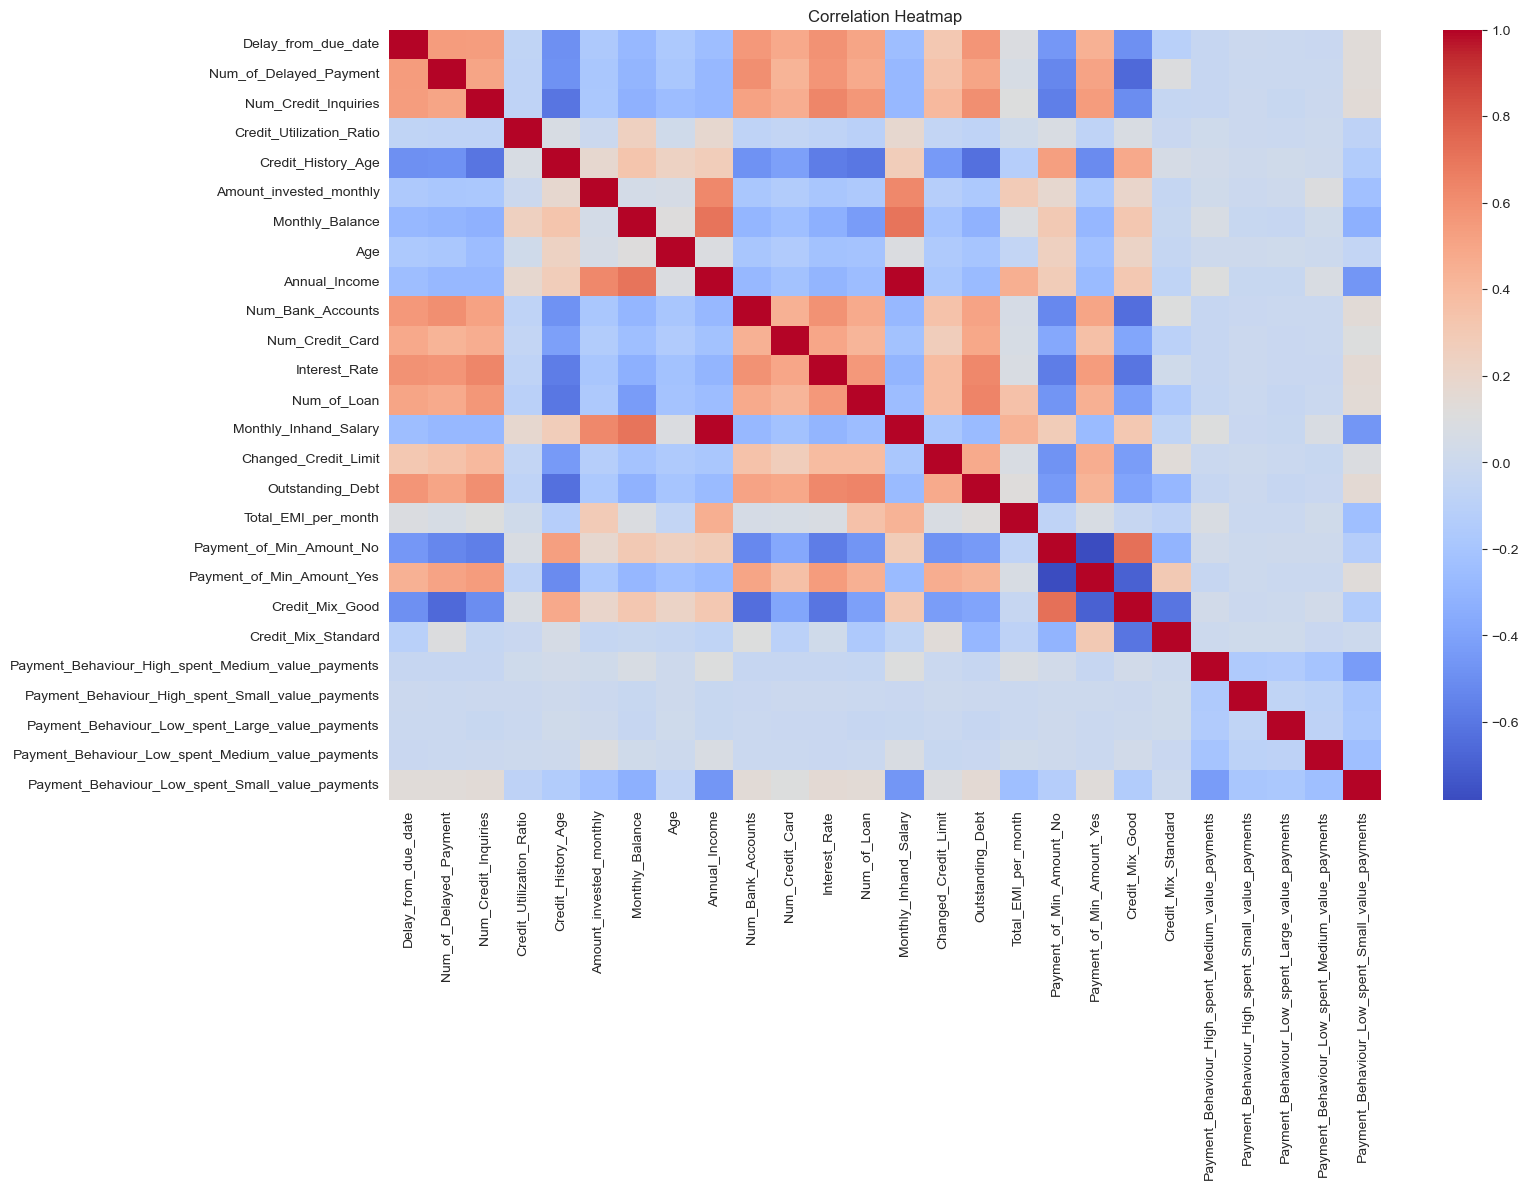

In [81]:
# Построить `сorrelation heatmap` и/или воспользоваться методом `corr()`.
df_corr = pd.DataFrame(X_scaled, columns=X.columns).corr()
plt.figure(figsize=(16, 10))
sns.heatmap(df_corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

In [82]:
# Выбрать наиболее важные признаки эвристически или на основании каких-нибудь вычислений.
np.fill_diagonal(df_corr.values, 0)
threshold_corr = 0.65
correlated = (df_corr.abs() > threshold_corr)
feature_importance = correlated.sum(axis=1)
important_features = feature_importance[feature_importance > 0].index.tolist()
important_features

['Num_of_Delayed_Payment',
 'Monthly_Balance',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Payment_of_Min_Amount_No',
 'Payment_of_Min_Amount_Yes',
 'Credit_Mix_Good']

In [83]:
X_filtered = pd.DataFrame(X_scaled, columns=X.columns)[important_features]
X_filtered

,Num_of_Delayed_Payment,Monthly_Balance,Annual_Income,Monthly_Inhand_Salary,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Credit_Mix_Good
0,-1.010592,-0.424239,-0.819568,-0.744381,1.343748,-1.048094,1.514097
1,-1.010592,-0.554215,-0.819568,-0.744381,1.343748,-1.048094,1.514097
2,-1.010592,-0.336940,-0.819568,-0.744381,1.343748,-1.048094,1.514097
3,-1.489066,-0.839578,-0.819568,-0.744381,1.343748,-1.048094,1.514097
4,-1.489066,-0.288992,-0.819568,-0.744381,1.343748,-1.048094,1.514097
...,...,...,...,...,...,...,...
99955,-1.010592,0.356465,-0.283849,-0.262796,1.343748,-1.048094,1.514097
99956,-1.010592,0.434760,-0.283849,-0.262796,1.343748,-1.048094,1.514097
99957,-1.170084,0.528784,-0.283849,-0.262796,1.343748,-1.048094,1.514097
99958,-1.170084,-0.393123,-0.283849,-0.262796,1.343748,-1.048094,1.514097


In [84]:
# Осуществить бинарную классификацию с отфильтрованными признаками.
X_train_f, X_test_f, y_train, y_test = train_test_split(X_filtered, y, test_size=0.3, random_state=42, stratify=y)
knn.fit(X_train_f, y_train)
y_pred_filtered = knn.predict(X_test_f)

In [85]:
# Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.
print("=== С фильтрацией признаков ===")
print("Accuracy:", accuracy_score(y_test, y_pred_filtered))
print("Precision:", precision_score(y_test, y_pred_filtered))
print("Recall:", recall_score(y_test, y_pred_filtered))
print("F1-Score:", f1_score(y_test, y_pred_filtered))
print(classification_report(y_test, y_pred_filtered))

=== С фильтрацией признаков ===
Accuracy: 0.7153528077897826
Precision: 0.5112107623318386
Recall: 0.41950321987120515
F1-Score: 0.4608388074785245
              precision    recall  f1-score   support

           0       0.78      0.84      0.81     21292
           1       0.51      0.42      0.46      8696

    accuracy                           0.72     29988
   macro avg       0.65      0.63      0.63     29988
weighted avg       0.70      0.72      0.71     29988



In [86]:
# Перебрать значения гиперпараметра $k$ в каком-нибудь диапазоне с использованием кросс-валидации на данных  с отфильтрованными признаками.
k_range = range(1, 25)
train_scores = []
test_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_filtered, y, cv=5)
    test_scores.append(scores.mean())


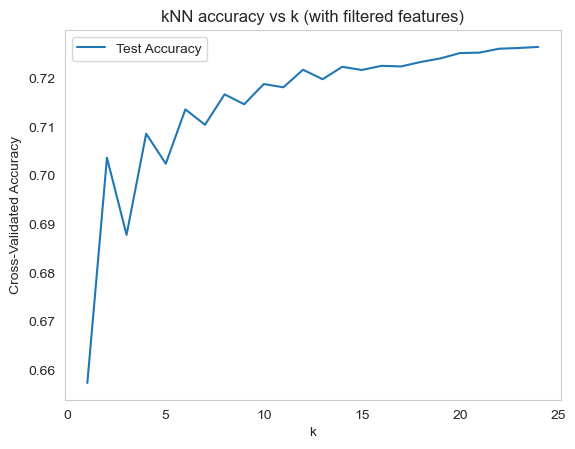

In [87]:
# Построить график *train/test accuracy* в зависимости от значения $k$.
plt.plot(k_range, test_scores, label="Test Accuracy")
plt.xlabel("k")
plt.ylabel("Cross-Validated Accuracy")
plt.title("kNN accuracy vs k (with filtered features)")
plt.legend()
plt.grid()
plt.show()

3. Многоклассовая классификация

In [88]:
df = pd.read_csv("../dataset/Score.csv")

In [89]:
# Привести описание датасета.
print(df.head())
print(df.info())
print(df['Credit_Score'].value_counts())

   Delay_from_due_date  Num_of_Delayed_Payment  Num_Credit_Inquiries  \
0                  3.0                     7.0                   4.0   
1                  3.0                     7.0                   4.0   
2                  3.0                     7.0                   4.0   
3                  5.0                     4.0                   4.0   
4                  6.0                     4.0                   4.0   

   Credit_Utilization_Ratio  Credit_History_Age Payment_of_Min_Amount  \
0                 26.822620               265.0                    No   
1                 31.944960               265.0                    No   
2                 28.609352               267.0                    No   
3                 31.377862               268.0                    No   
4                 24.797347               269.0                    No   

   Amount_invested_monthly  Monthly_Balance Credit_Score Credit_Mix  ...  \
0                80.415295       312.494089         

In [90]:
# Осуществить предобработку данных - "подчистить данные".
df = df.dropna()

In [91]:
# Закодировать категориальные признаки при необходимости.
for col in df.select_dtypes(include="object").columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [92]:
# Нормализовать данные.
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df.drop("Credit_Score", axis=1)), columns=df.columns.drop("Credit_Score"))
y = df["Credit_Score"]

In [93]:
# Выбрать какое-нибудь значение гиперпараметра $k$ алгоритма $kNN$.
k = 5

In [94]:
# Разбить выборку на обучающую и тестовую.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)

In [95]:
# Осуществить многоклассовую классификацию.
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [96]:
# Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.
print("=== С фильтрацией признаков ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="weighted"))
print("Recall:", recall_score(y_test, y_pred, average="weighted"))
print("F1-Score:", f1_score(y_test, y_pred, average="weighted"))
print(classification_report(y_test, y_pred, output_dict=True))

=== С фильтрацией признаков ===
Accuracy: 0.7461984793917567
Precision: 0.7480744493614723
Recall: 0.7461984793917567
F1-Score: 0.7468990483106678
{'0': {'precision': 0.6495400104148585, 'recall': 0.6998316813166261, 'f1-score': 0.6737486496218942, 'support': 5347.0}, '1': {'precision': 0.7395605659726217, 'recall': 0.7393054277828887, 'f1-score': 0.7394329748691701, 'support': 8696.0}, '2': {'precision': 0.7857602677996652, 'recall': 0.7655064283474443, 'f1-score': 0.7755011277359509, 'support': 15945.0}, 'accuracy': 0.7461984793917567, 'macro avg': {'precision': 0.7249536147290484, 'recall': 0.7348811791489864, 'f1-score': 0.7295609174090051, 'support': 29988.0}, 'weighted avg': {'precision': 0.7480744493614723, 'recall': 0.7461984793917567, 'f1-score': 0.7468990483106678, 'support': 29988.0}}


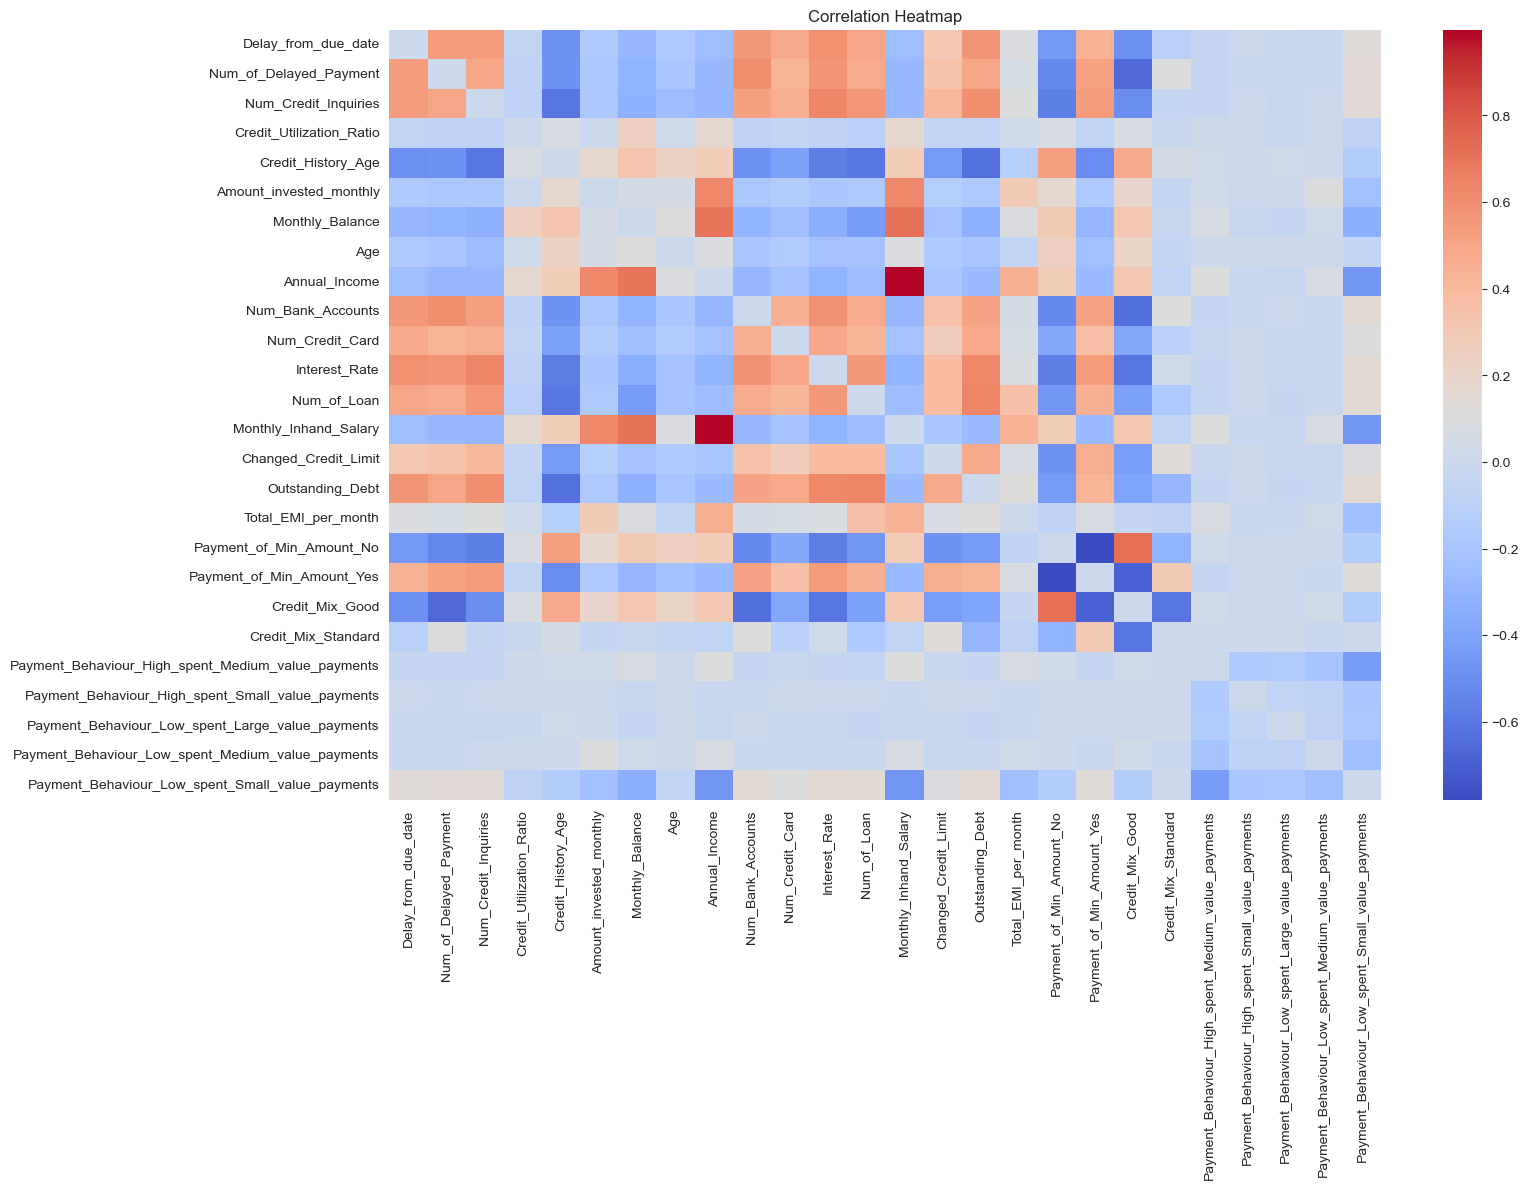

In [97]:
# Построить `сorrelation heatmap` и/или воспользоваться методом `corr()`.
corr_matrix = X_scaled.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(df_corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

In [98]:
# Выбрать наиболее важные признаки эвристически или на основании каких-нибудь вычислений.
np.fill_diagonal(corr_matrix.values, 0)
T_corr = 0.7
mask = (abs(corr_matrix) > T_corr)
importance = mask.sum(axis=1)
selected_features = importance[importance > 0].index.tolist()
X_filtered = X_scaled[selected_features]

In [99]:
# Осуществить многоклассовую классификацию с отфильтрованными признаками.
X_train_f, X_test_f = X_filtered.loc[X_train.index], X_filtered.loc[X_test.index]
knn.fit(X_train_f, y_train)
y_pred_f = knn.predict(X_test_f)

In [107]:
# Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.
print("=== С фильтрацией признаков ===")
print("Accuracy:", accuracy_score(y_test, y_pred_f))
print("Precision:", precision_score(y_test, y_pred_f, average="weighted"))
print("Recall:", recall_score(y_test, y_pred_f, average="weighted"))
print("F1-Score:", f1_score(y_test, y_pred_f, average="weighted"))
print(classification_report(y_test, y_pred_f))

=== С фильтрацией признаков ===
Accuracy: 0.48249299719887956
Precision: 0.4797487810298483
Recall: 0.48249299719887956
F1-Score: 0.4810580266563117
              precision    recall  f1-score   support

           0       0.29      0.28      0.28      5347
           1       0.42      0.42      0.42      8696
           2       0.57      0.59      0.58     15945

    accuracy                           0.48     29988
   macro avg       0.43      0.43      0.43     29988
weighted avg       0.48      0.48      0.48     29988



In [101]:
# Перебрать значения гиперпараметра $k$ в каком-нибудь диапазоне с использованием кросс-валидации на данных
train_scores = []
test_scores = []
k_range = range(1, 21)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_filtered, y, cv=5, scoring="accuracy")
    train_scores.append(np.mean(cross_val_score(knn, X_train_f, y_train, cv=5)))
    test_scores.append(np.mean(scores))

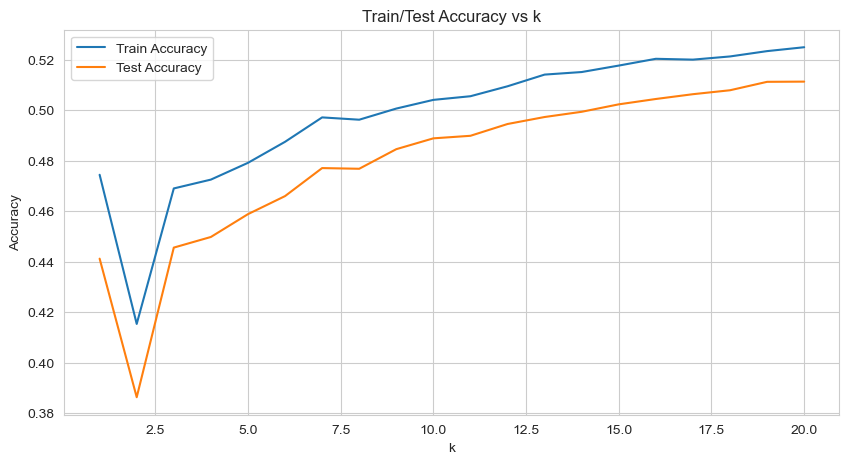

In [102]:
# Построить график *train/test accuracy* в зависимости от значения $k$.
plt.figure(figsize=(10, 5))
plt.plot(k_range, train_scores, label="Train Accuracy")
plt.plot(k_range, test_scores, label="Test Accuracy")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Train/Test Accuracy vs k")
plt.legend()
plt.grid(True)
plt.show()

In [106]:
# Для лучшего классификатора привести метрики, `classification_report`, построить [confusion matrix]
best_k = k_range[np.argmax(test_scores)]
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_f, y_train)
y_pred_best = best_knn.predict(X_test_f)
conf_matrix = confusion_matrix(y_test, y_pred_best)

print("confusion matrix: ", conf_matrix)
print(classification_report(y_test, y_pred_best))

confusion matrix:  [[  678   662  4007]
 [  328  3158  5210]
 [  932  3204 11809]]
              precision    recall  f1-score   support

           0       0.35      0.13      0.19      5347
           1       0.45      0.36      0.40      8696
           2       0.56      0.74      0.64     15945

    accuracy                           0.52     29988
   macro avg       0.45      0.41      0.41     29988
weighted avg       0.49      0.52      0.49     29988

